\author{Brice Robert} 

***Student:*** Brice Robert, ***Track:*** ICS

***Document:*** REPORT.pdf, ***Type:*** Laboratory

***Languages used:*** LaTeX, Julia (in lieu of MATLAB)

***Tools used:*** Jupyter, nbconvert (converting to PDF)

***Permanent Link:*** https://github.com/setrar/MobCom/blob/main/Lab/REPORT.ipynb

| MATLAB PROJECT for MOBCOM |
|:-:|
| EURECOM |
| November 21st, 2024 |
| Class Instructor: Petros Elia |
| elia@eurecom.fr |

- Read carefully the following questions, and using MATLAB, provide the answers/plots in the form of a report.
- The report should include a title page, and should be properly labeled and named. The report should be in the form of a PDF.
- Graphs should include labels, titles, and captions.
- Each graph should be accompanied with pertinent comments.
- Use optimal (maximum likelihood) decoders, unless stated otherwise.
- To compare the empirical results with the corresponding theoretical result, you should superimpose the two corresponding graphs and provide comments and intuition on the comparison.
- For each plot, describe the theoretical background that guides the proper choice of parameters for simulations (i.e., power constraint).
- You can work in groups of two or three.


- Regarding Grading:
    - All questions are weighted equally.
    - Submit your report (labeled and named) via email, to Hui Zhao (Hui.Zhao@eurecom.fr) and to myself.
    - Submission deadline is December 12th, 2024.




Enjoy!






---
**$$\text{PROBLEM 3}$$**

Use simulations to establish the probability of deep fade  

$P(\|\tilde{h}\|^2 < \text{SNR}^{-1})$

where $\|\tilde{h}\|^2$ now comes from the $\chi^2$-squared fading distribution with $2 \times 3 = 6$ degrees of freedom.

- **What do you observe compared to the previous two problems?**

In all the above, the y-axis is the probability of deep fade, in log scale ($\log_{10}(\text{Prob})$), and the x-axis is the SNR, in dB.  

---
Import Required Libraries


In [1]:
using Random
using Distributions
using LinearAlgebra
using Plots, LaTeXStrings, Measures 
using FFTW

In [2]:
# functions and variables to increase readability
include("modules/operations.jl");

In [3]:
# Define base values and offsets
base_values = [-0.00, -0.50, -1.00, -1.50, -2.00]
offsets = [-0.0, -0.02, -0.10, -0.15, -0.20, -0.30, -0.40, -0.70]
include("modules/view_helper.jl");

# **Deep Fade Probability with $\chi^2$-Squared Fading Distribution**

This problem requires simulating the deep fade probability:
$P(\|\tilde{h}\|^2 < \text{SNR}^{-1}),$
where:
- $\|\tilde{h}\|^2$ follows a $\chi^2$-squared distribution with $6$ degrees of freedom ($2 \times 3$, for 3 independent Rician-like variables).

---

### **Key Differences**
Compared to Problems 1 and 2:
1. Instead of Rician fading, we directly simulate a $\chi^2$-squared random variable to represent $\|\tilde{h}\|^2$.
2. Degrees of freedom affect the distribution:
   - Higher degrees of freedom reduce variability and deep fade probability.

---

### **Simulation Steps**

#### **Step 1: Simulating $\chi^2$-Squared Distribution**
A $\chi^2$-squared random variable with $k$ degrees of freedom is defined as the sum of squares of $k$ independent standard normal random variables:
$\|\tilde{h}\|^2 \sim \chi^2(k).$


In [4]:
# Generate χ²-squared random variables
function generate_chisq(n, k)
    return rand(Chisq(k), n)  # Generate n samples from χ²(k)
end;

#### **Step 2: Probability of Deep Fade**
Compute the probability:
$P(\|\tilde{h}\|^2 < \text{SNR}^{-1}),$
for a range of SNR values.



In [5]:
# Compute deep fade probability for χ² distribution
function deep_fade_probability_chisq(h::Vector{Float64}, SNR_range::Vector{Float64})
    probabilities = Float64[]
    for SNR_dB in SNR_range
        SNR_linear = 10^(SNR_dB / 10)  # Convert dB to linear scale
        threshold = 1 / SNR_linear
        fade_count = count(x -> x < threshold, h)
        push!(probabilities, fade_count / length(h))
    end
    return probabilities
end;

#### **Step 3: Monte Carlo Simulation**
Simulate $\chi^2$-squared fading for $6$ degrees of freedom and compute the deep fade probabilities.



In [14]:
# Parameters
n_samples = 10^6  # Number of samples
degrees_of_freedom = 6  # 2 x 3 for 3 independent Rician variables
SNR_dB_range = 0:3:20;  # SNR range in dB

#### **Step 4: Plot Results**
Plot the deep fade probability for $\chi^2$-squared fading, in comparison with previous results from Problems 1 and 2.


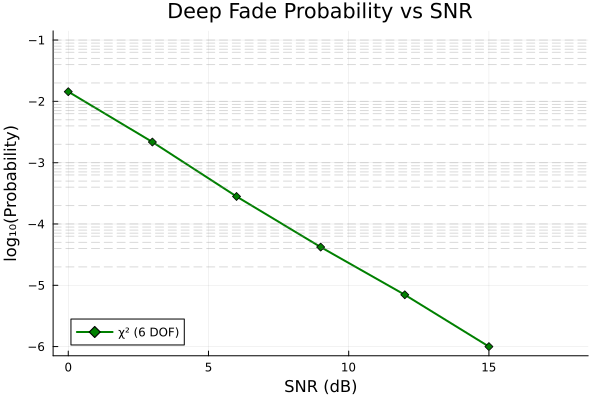

In [15]:
# Convert SNR_dB_range to Vector{Float64}
SNR_dB_vector = Float64.(SNR_dB_range)  # Explicit conversion to Vector{Float64}

# Generate χ²-squared random variables
h_chisq = generate_chisq(n_samples, degrees_of_freedom)

# Compute deep fade probabilities
prob_chisq = deep_fade_probability_chisq(h_chisq, SNR_dB_vector)

# Plot χ² results
plot(SNR_dB_vector, log10.(prob_chisq), 
     label="χ² (6 DOF)", marker=:diamond, lw=2, color=:green,
     xlabel="SNR (dB)", ylabel="log₁₀(Probability)", title="Deep Fade Probability vs SNR", 
     grid=true)
add_combined_hlines!(offsets, base_values, linestyle=:dash, lw=1, color=:gray, alpha=0.3)